# Hierarchical Clustering

In [ ]:
!pip install pandas scikit-learn matplotlib scipy

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your customs dataset
df = pd.read_csv("/content/drive/MyDrive/Unsupervised Learning/Data/Import_data_cleansed.csv")

In [ ]:
# Select relevant columns for clustering
columns_for_clustering = ["FOB VALUE", "HS CODE"]

In [ ]:
# Preprocess the data
# You may need to further preprocess the data based on your specific needs.
# For this example, we'll standardize the selected columns.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_clustering])

In [ ]:
# Perform hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward', metric='euclidean')

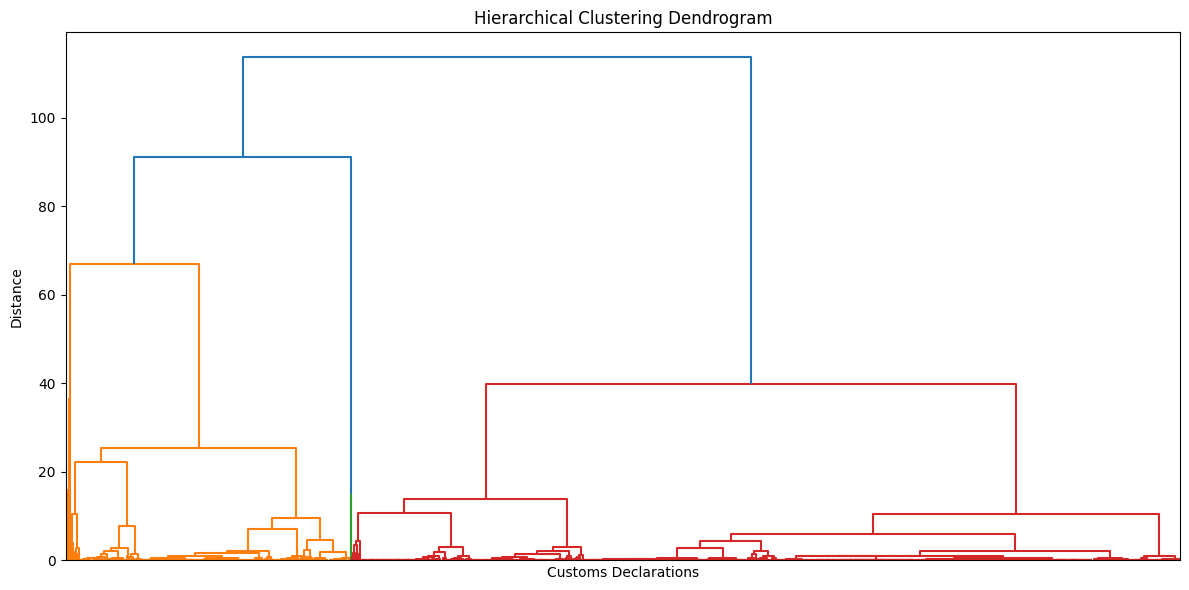

In [ ]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, orientation="top",  no_labels=True, distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customs Declarations")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()

# Show the dendrogram
plt.show()

The linkage matrix provides a detailed view of the merging process in hierarchical clustering. It allows you to understand how individual data points or clusters are combined into larger clusters and how the hierarchical structure of the clusters evolves. You can use this information to make decisions about the number of clusters to extract or to gain insights into the similarity relationships between your customs declarations.

In [ ]:
# Determine the number of clusters based on the dendrogram
from scipy.cluster.hierarchy import fcluster

# Set a linkage distance threshold to cut the dendrogram
threshold = 4  # Adjust as needed

# Extract clusters based on the threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels to the original dataframe
df["Cluster"] = clusters

In this step, we use the fcluster function from SciPy to cut the dendrogram at a specified linkage distance threshold. You can adjust the threshold variable to control the number of clusters.

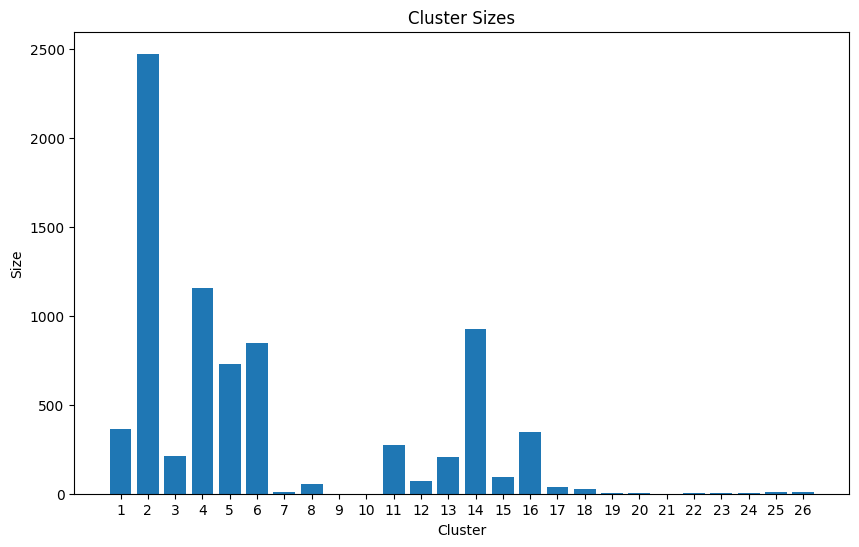

In [ ]:
# Sort clusters by size
cluster_counts = df["Cluster"].value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Size"]
cluster_counts = cluster_counts.sort_values(by="Cluster")

# Visualize clusters and display statistics
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts["Cluster"], cluster_counts["Size"])
plt.xlabel("Cluster")
plt.ylabel("Size")
plt.title("Cluster Sizes")
plt.xticks(cluster_counts["Cluster"])
plt.show()

In [ ]:
# Print sorted clusters
for cluster_id, size in zip(cluster_counts["Cluster"], cluster_counts["Size"]):
    cluster_data = df[df["Cluster"] == cluster_id]
    print(f"Cluster {cluster_id}: {size} customs declarations")

Cluster 1: 363 customs declarations
Cluster 2: 2475 customs declarations
Cluster 3: 215 customs declarations
Cluster 4: 1155 customs declarations
Cluster 5: 730 customs declarations
Cluster 6: 847 customs declarations
Cluster 7: 9 customs declarations
Cluster 8: 53 customs declarations
Cluster 9: 1 customs declarations
Cluster 10: 1 customs declarations
Cluster 11: 273 customs declarations
Cluster 12: 73 customs declarations
Cluster 13: 206 customs declarations
Cluster 14: 926 customs declarations
Cluster 15: 93 customs declarations
Cluster 16: 346 customs declarations
Cluster 17: 39 customs declarations
Cluster 18: 24 customs declarations
Cluster 19: 2 customs declarations
Cluster 20: 3 customs declarations
Cluster 21: 1 customs declarations
Cluster 22: 2 customs declarations
Cluster 23: 3 customs declarations
Cluster 24: 5 customs declarations
Cluster 25: 8 customs declarations
Cluster 26: 11 customs declarations


#Feedback and Refinement

Iterating on the clustering analysis may involve adjusting parameters or preprocessing steps based on insights gained from the cluster interpretation. You can make these adjustments and repeat the clustering process as needed.

# Reporting

For reporting, you can export the results, insights, and recommendations in a suitable format for presentation to customs administrations. This step will depend on your organization's preferred reporting methods.

These steps provide a framework for extracting, analyzing, and presenting insights from the hierarchical clustering of customs data. Depending on the specific objectives and requirements of your customs-related analysis, you can further customize and refine these code snippets.

To utilize risk management for the clusters in the context of customs, you can generate insights specific to customs operations and identify potential risks associated with different clusters. Here are some coding steps to extract customs-related insights and assess risk within each cluster:

In [ ]:
risk_features = ["COUNTRY OF ORIGIN", "FOB VALUE", "HS CODE"]

Within each cluster, calculate and analyze customs-related statistics that indicate potential risk factors. This could involve calculating the frequency of certain tariff codes or other customs-related characteristics.

In [ ]:
for cluster_id, size in zip(cluster_counts["Cluster"], cluster_counts["Size"]):
    cluster_data = df[df["Cluster"] == cluster_id]

    print(f"Cluster {cluster_id}: {size} customs declarations")

    # Risk assessment based on country of origin
    country_of_origin_counts = cluster_data["COUNTRY OF ORIGIN"].value_counts()
    print("\nRisk Assessment for Countries of Origin:")
    print(country_of_origin_counts.head(10))  # Display the top 10 most common countries

    # Risk assessment based on FOB value statistics
    fob_value_stats = cluster_data["FOB VALUE"].describe()
    print("\nRisk Assessment for FOB Values:")
    print(fob_value_stats)

    # Risk assessment based on common tariff codes
    tariff_code_counts = cluster_data["HS CODE"].value_counts()
    print("\nRisk Assessment for Tariff Codes:")
    print(tariff_code_counts.head(10))  # Display the top 10 most common tariff codes

    # Example of risk-based recommendations based on available risk features
    risk_recommendations = []

    if "High Risk Country" in country_of_origin_counts:
        risk_recommendations.append("Enhanced monitoring of imports from high-risk countries.")

    if fob_value_stats["max"] > 1000000:
        risk_recommendations.append("Close examination of high-value shipments.")

    if "High Risk Tariff Code" in tariff_code_counts:
        risk_recommendations.append("Increased scrutiny for high-risk tariff codes.")

    if len(risk_recommendations) == 0:
        risk_recommendations.append("No specific risk detected.")

    print("\nRisk-Based Recommendations:")
    for recommendation in risk_recommendations:
        print(f"- {recommendation}")

Cluster 1: 363 customs declarations

Risk Assessment for Countries of Origin:
China                       176
United States                33
Republic of South Africa     23
India                        23
United Kingdom               17
United Arab Emirates         17
Kenya                        11
Germany                       7
Turkey                        7
Netherlands                   6
Name: COUNTRY OF ORIGIN, dtype: int64

Risk Assessment for FOB Values:
count    3.630000e+02
mean     1.311087e+06
std      2.772715e+06
min      0.000000e+00
25%      8.983937e+04
50%      2.963923e+05
75%      1.213260e+06
max      2.071240e+07
Name: FOB VALUE, dtype: float64

Risk Assessment for Tariff Codes:
940540000000    56
950300000000    33
940360000000    23
940490000000    18
961400000000    16
940320000000    16
960390000000    15
950699000000    14
961700000000    12
950691000000    10
Name: HS CODE, dtype: int64

Risk-Based Recommendations:
- Close examination of high-value shipmen

In this code:

We focus on risk assessments and recommendations based on the available columns: "COUNTRY OF ORIGIN," "FOB VALUE," and "HS CODE."

We calculate statistics for the FOB values within each cluster, such as mean, standard deviation, min, and max.

We assess risk based on common tariff codes within each cluster.

We provide risk-based recommendations specific to the available risk features. For example, enhanced monitoring of imports from high-risk countries, closer examination of high-value shipments, and increased scrutiny for high-risk tariff codes.